# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [121]:
# Importing needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# import tweepy
import requests as r

In [122]:
# already uploaded the Twitter_archive_enhanced.csv

tweet_data = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [161]:
# Using the requests library to download the tweet image prediction programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [123]:
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [164]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [125]:
import json

tweet_list = []
with open('tweet-json.txt','r') as file:
    for i in file:
        tweets = json.loads(i)
        tweet_list.append(tweets)

In [126]:
tweet_list;

In [127]:
additional_tweet_data = pd.DataFrame(tweet_list)

In [128]:
additional_tweet_data = additional_tweet_data[['id','geo','retweet_count','favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



> #### Visual Assessment

In [129]:
tweet_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,None,None,None,None
1337,705102439679201280,NaN,NaN,2016-03-02 18:48:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705102439...,10,10,Terrenth,None,None,None,None
1767,678396796259975168,NaN,NaN,2015-12-20 02:09:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678396796...,12,10,None,None,None,None,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None
1570,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ember. That's the q-tip she owes money...,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
450,818646164899774465,NaN,NaN,2017-01-10 02:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Seamus. He's very bad a...,8.083449e+17,4.196984e+09,2016-12-12 16:16:49 +0000,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/...",11,10,Seamus,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None


In [130]:
additional_tweet_data.sample(10)

,id,geo,retweet_count,favorite_count
857,763183847194451968,None,1702,6004
778,775842724423557120,None,3116,13022
1397,699691744225525762,None,5174,11252
1779,677698403548192770,None,363,1332
20,887705289381826560,None,5609,30779
541,806219024703037440,None,1388,7145
2045,671518598289059840,None,319,1010
507,812503143955202048,None,1424,6787
1785,677565715327688705,None,513,1409
2300,667012601033924608,None,237,471


In [131]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
508,676098748976615425,https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg,1,walking_stick,0.162179,False,sandal,0.129086,False,purse,0.081412,False
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
1175,737445876994609152,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,Samoyed,0.400568,True,Pomeranian,0.331268,True,Maltese_dog,0.045426,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True


> #### Programmatic Assessment

> Checking for missing data

In [132]:
image_prediction.isna().all()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [133]:
tweet_data.isna().all()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [134]:
additional_tweet_data.isna().all()

id                False
geo                True
retweet_count     False
favorite_count    False
dtype: bool

In [135]:
image_prediction.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [136]:
tweet_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [137]:
additional_tweet_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   geo             0 non-null      object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 64.4+ KB


In [138]:
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> Checking number of dogs with zero rating

In [139]:
tweet_data[(tweet_data.rating_numerator<1) & (tweet_data.rating_denominator>1)].all().sum()

16

>Ratings with denominator __greater than 10 values__

In [140]:
tweet_data[tweet_data.rating_denominator>10].count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

> Checking for missing data in the 3 tables

In [141]:
image_prediction.shape

(2075, 12)

In [142]:
tweet_data.shape

(2356, 17)

In [143]:
additional_tweet_data.shape

(2354, 4)

In [144]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [145]:
additional_tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


>Checking the correlation of favorite and retweet count in the __additional_tweet_data__ dataset

In [146]:
additional_tweet_data[(additional_tweet_data.favorite_count<1) & (additional_tweet_data.retweet_count>1000)].sum()

id                -3672632073111277423
geo                                  0
retweet_count                  1445718
favorite_count                       0
dtype: object

> Checking for columns where __name__ of dogs in the __tweet_data__ is equal to None

In [147]:
len(tweet_data[tweet_data.name =='None'].index)

745

> Checking for duplicate data

In [148]:
print(f'Duplicated data for tweet_data: {tweet_data.tweet_id.duplicated().all()}\n Duplicated data for image_predictions: {image_prediction.tweet_id.duplicated().all()} \n Duplicated data for Additional Tweet Data: {additional_tweet_data.id.duplicated().all()}')

Duplicated data for tweet_data: False
 Duplicated data for image_predictions: False 
 Duplicated data for Additional Tweet Data: False


### Quality issues
1. Tweet id are integers instead of strings.


2. set id as the index in the datasets.


3. Replies to tweets should be dropped


4. Retweets should be droppped



5. Extraneous columns in the dataset.


4. Zero favorite count with huge retweet count in the __additional tweet data__ sample


5. Ratings of dogs have values of zero.


6. Ratings of dogs with denominator greater than 10


8. Configuration accuracy in the __Image Predictions__ dataset should be in percentage






### Tidiness issues
1. Rating denominator and numerator should be in one column


2. Dog levels are in different columns


3. __Additional tweet data__ should be joined to the main __tweet data__ dataset 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [387]:
# Make copies of original pieces of data
tweet_data_copy = tweet_data.copy()
additional_tweet_data_copy = additional_tweet_data.copy()
image_prediction_copy = image_prediction.copy()

### Issue #1:   
Tweet id are integers instead of strings.


#### Define:  
Convert data type of the __"tweet_id"__, __"id"__ and __"tweet_id"__ columns in the __tweet_data_copy__, __additional_tweet_data_copy__ and __image_prediction_copy__ dataset respectively from *__integer__* to *__strings__*

#### Code

In [388]:
tweet_data_copy['tweet_id'] = tweet_data_copy['tweet_id'].astype(str);

In [389]:
additional_tweet_data_copy['id'] = additional_tweet_data_copy['id'].astype(str);

In [390]:
image_prediction_copy['tweet_id'] = image_prediction_copy['tweet_id'].astype(str);

#### Test

In [391]:
tweet_data_copy['tweet_id'].dtype

dtype('O')

In [392]:
additional_tweet_data_copy['id'].dtype

dtype('O')

In [393]:
image_prediction_copy['tweet_id'].dtype

dtype('O')

### Issue #2:

#### Define:
Set the id's in each dataset as the index

In [394]:
tweet_data_copy = tweet_data_copy.set_index('tweet_id');

In [395]:
additional_tweet_data_copy = additional_tweet_data_copy.set_index('id');

In [396]:
image_prediction_copy = image_prediction_copy.set_index('tweet_id');

#### Test:

In [397]:
tweet_data_copy.index

Index(['892420643555336193', '892177421306343426', '891815181378084864',
       '891689557279858688', '891327558926688256', '891087950875897856',
       '890971913173991426', '890729181411237888', '890609185150312448',
       '890240255349198849',
       ...
       '666058600524156928', '666057090499244032', '666055525042405380',
       '666051853826850816', '666050758794694657', '666049248165822465',
       '666044226329800704', '666033412701032449', '666029285002620928',
       '666020888022790149'],
      dtype='object', name='tweet_id', length=2356)

In [398]:
additional_tweet_data_copy.index

Index(['892420643555336193', '892177421306343426', '891815181378084864',
       '891689557279858688', '891327558926688256', '891087950875897856',
       '890971913173991426', '890729181411237888', '890609185150312448',
       '890240255349198849',
       ...
       '666058600524156928', '666057090499244032', '666055525042405380',
       '666051853826850816', '666050758794694657', '666049248165822465',
       '666044226329800704', '666033412701032449', '666029285002620928',
       '666020888022790149'],
      dtype='object', name='id', length=2354)

In [399]:
image_prediction_copy.index

Index(['666020888022790149', '666029285002620928', '666033412701032449',
       '666044226329800704', '666049248165822465', '666050758794694657',
       '666051853826850816', '666055525042405380', '666057090499244032',
       '666058600524156928',
       ...
       '890240255349198849', '890609185150312448', '890729181411237888',
       '890971913173991426', '891087950875897856', '891327558926688256',
       '891689557279858688', '891815181378084864', '892177421306343426',
       '892420643555336193'],
      dtype='object', name='tweet_id', length=2075)

### Issue #3:

#### Define:
Replies to tweets should be dropped

#### Code

In [400]:
tweet_data_copy.shape

(2356, 16)

In [401]:
tweet_data_copy = tweet_data_copy[tweet_data_copy.in_reply_to_status_id.isna()]

#### Test:

In [402]:
tweet_data_copy.in_reply_to_status_id.notna().sum()

0

In [403]:
tweet_data_copy.shape

(2278, 16)

### Issue #4: 
 Retweets should be droppped

#### Define:

Tweets that are retweets of original tweets are not supposed to be part of our dataset

#### Code

In [404]:
tweet_data_copy.shape

(2278, 16)

In [405]:
tweet_data_copy = tweet_data_copy[tweet_data_copy.retweeted_status_id.isna()]

#### Test:

In [406]:
tweet_data_copy.retweeted_status_id.notna().sum()

0

In [407]:
tweet_data_copy.shape

(2097, 16)

### Issue #5:   
Ratings of dogs have values of zero.

#### Define:

Dogs are mostly rated more than 10, dogs rated in the rating_numerator and rating_denominator should be dropped.

#### Code

In [408]:
tweet_data_copy = tweet_data_copy[(tweet_data_copy.rating_numerator!=0)]

#### Test:

In [409]:
(tweet_data_copy.rating_numerator==0).value_counts()

False    2096
Name: rating_numerator, dtype: int64

### Issue #6:   
Ratings of dogs with denominator greater than 10

#### Define:

Dogs are rated on a scale of 1-10, most are rated more than 10 in the numerator but the denominator should be 10.

#### Code

In [410]:
tweet_data_copy = tweet_data_copy[tweet_data_copy.rating_denominator==10] 

#### Test:

In [411]:
tweet_data_copy.rating_denominator.value_counts()

10    2079
Name: rating_denominator, dtype: int64

### Issue #7:   
Configuration accuracy in the __Image Predictions__ dataset should be in percentage

#### Define:
The image predictions would be better understood and easier to read when expressed in percentage.

#### Code

In [412]:
image_prediction_copy.head(2)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [413]:
image_prediction_copy.p1_conf = (image_prediction_copy.p1_conf*100).round(2)

In [414]:
image_prediction_copy.p2_conf = (image_prediction_copy.p2_conf*100).round(2)

In [415]:
image_prediction_copy.p3_conf = (image_prediction_copy.p3_conf*100).round(2)

#### Test:

In [416]:
image_prediction_copy.head(4)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True


### Issue #8:   
Extraneous columns in the datasets.


#### Define:

Not all columns in the datasets are needed for analysis is needed for analysis

#### Code

> for the __tweet_data_copy__ dataset

In [417]:
tweet_data_copy = tweet_data_copy[['rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]

> for the __additional_tweet_data_copy__ dataset

In [418]:
additional_tweet_data_copy = additional_tweet_data_copy[['retweet_count','favorite_count']]

> for the __image_prediction_copy__ dataset

In [419]:
image_prediction_copy = image_prediction_copy.drop(columns = ['jpg_url','img_num'], axis=1) 

#### Test:

In [420]:
tweet_data_copy.head(2)

,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,
892420643555336193,13,10,Phineas,None,None,None,None
892177421306343426,13,10,Tilly,None,None,None,None


In [421]:
additional_tweet_data_copy.head(2)

,retweet_count,favorite_count
id,,
892420643555336193,8853,39467
892177421306343426,6514,33819


In [422]:
image_prediction_copy.head(2)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,
666020888022790149,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
666029285002620928,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True


### Issue #9:   
Rating denominator and numerator should be in one column

#### Define:

One of the rules of tidiness is that one column represents one variable, here, a single variable is split in 2 columns.

Join the 2 columns into one "ratings" column

#### Code

In [423]:
tweet_data_copy.head(2)

,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,
892420643555336193,13,10,Phineas,None,None,None,None
892177421306343426,13,10,Tilly,None,None,None,None


> First convert the series to string so as to be able to combine them

In [424]:
tweet_data_copy['rating_numerator'] = tweet_data_copy['rating_numerator'].astype(str)

In [425]:
tweet_data_copy['rating_denominator'] = tweet_data_copy['rating_denominator'].astype(str)

> Merging the two series

In [426]:
tweet_data_copy['ratings'] = tweet_data_copy.rating_numerator + '/' + tweet_data_copy.rating_denominator 

> Dropping the original rating seris 

In [427]:
tweet_data_copy = tweet_data_copy.drop(columns=['rating_numerator','rating_denominator'], axis=1)

#### Test:

In [428]:
tweet_data_copy.head()

,name,doggo,floofer,pupper,puppo,ratings
tweet_id,,,,,,
892420643555336193,Phineas,None,None,None,None,13/10
892177421306343426,Tilly,None,None,None,None,13/10
891815181378084864,Archie,None,None,None,None,12/10
891689557279858688,Darla,None,None,None,None,13/10
891327558926688256,Franklin,None,None,None,None,12/10


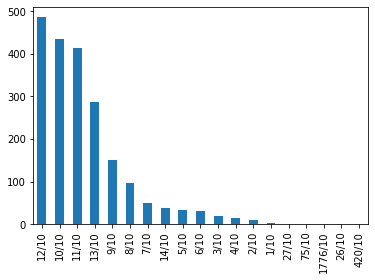

In [429]:
tweet_data_copy.ratings.value_counts().plot(kind='bar');

### Issue #10:   
Dog levels are in different columns

#### Define:

One of the rules of tidiness is that one column represents one variable, here, a single variable is split in 2 columns.

Join the 4 columns into one "dog_stage" column

In [430]:
tweet_data_copy.head(2)

,name,doggo,floofer,pupper,puppo,ratings
tweet_id,,,,,,
892420643555336193,Phineas,None,None,None,None,13/10
892177421306343426,Tilly,None,None,None,None,13/10


In [432]:
tweet_data_copy = pd.melt(tweet_data_copy,id_vars=['name','ratings'], var_name = 'level',value_vars=['doggo','floofer','pupper','puppo'], ignore_index=False)

In [436]:
tweet_data_copy.head(2)

,name,ratings,level,value
tweet_id,,,,
892420643555336193,Phineas,13/10,doggo,None
892177421306343426,Tilly,13/10,doggo,None


In [441]:
tweet_data_copy.value.dtype

dtype('O')

In [434]:
tweet_data_copy.shape

(8316, 4)

In [442]:
tweet_data_copy = tweet_data_copy[tweet_data_copy.value != "None"]

In [443]:
tweet_data_copy.shape

(347, 4)

In [435]:
tweet_data_copy.value.value_counts()

None       7969
pupper      230
doggo        83
puppo        24
floofer      10
Name: value, dtype: int64

In [ ]:
help(pd.melt)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.

2.

3.

### Visualization